This model walks throug the entire workflow for a sysml model interacting with the python enviornment...

In [6]:
import os
os.path

<function posixpath.abspath(path)>

In [3]:
# This is a sysml model in string format for working in python
model = '''
package workflow_model {

    import ScalarValues::*;
    
    package Requirments{
        requirement def id 'A' payload{
            doc /* System shall be capable of carrying a minimum of 10 pounds. */
                attribute massLoad: Real;
                attribute massCapacity: Real;
                require constraint { massLoad <= massCapacity }

                requirement def id 'A.1' payloadHandling{
                doc /* UAV shall be capable of safely carrying payloads sensitive to vibration and g forces */
                    attribute packageGforce: Real;
                    require constraint {0.8<= packageGforce <= 1.2 }
                }
                requirement def id 'A.3' systemCost{
                    doc /* The system shall cost less than $500,000 USD. */
                    attribute cost: Real;
                    require constraint {cost<= 500000 }
                }
        }
    }

    package Model {
        doc /* Based on the Kerbal model of `model` and parts library */
    
        part def droneSystem {
            part drones : 'Drone Type' [1..3] {
                attribute massCapacity: Real;
                attribute packageGforce: Real;
                attribute cost: Real;
            }
        }
        
        abstract part def 'Drone Type';
    
    }

    package Variants {}
    package Analysis {}
    package Validation {}
}
'''

In [2]:
#print(model)

In [4]:
%capture
%expand
{model}

Package workflow_model (3022f04b-1702-4da3-bdf0-0371f4ad8b92)


Cell output captured to variable __captured with content

[('execute_result',
  {'data': {'text/plain': 'Package workflow_model '
                          '(46419758-abf4-4da9-8b29-b253c124ee18)\n'},
   'execution_count': 4,
   'metadata': {}}),
 ('execute_result',
  {'data': {'text/plain': 'Package workflow_model '
                          '(3022f04b-1702-4da3-bdf0-0371f4ad8b92)\n'},
   'execution_count': 4,
   'metadata': {}})]

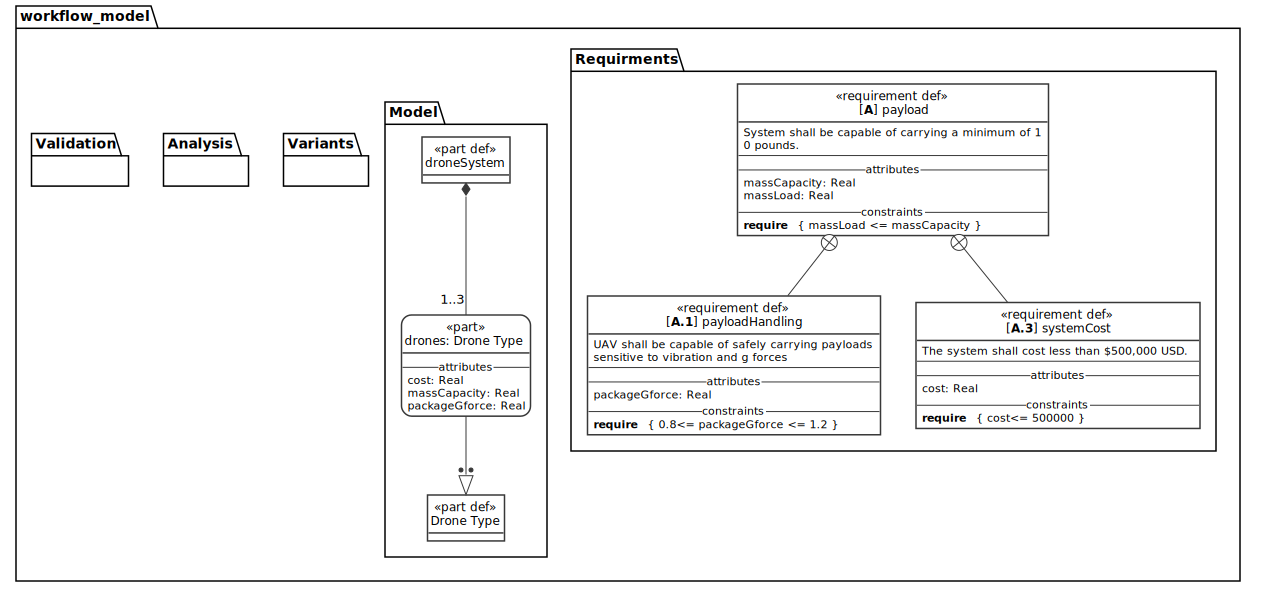

In [5]:
%viz workflow_model

In [6]:
if len(__captured) == 0:
    print("Warning - No Model...")

In [7]:
#print(model)

In [4]:
import sysml2 as m
from sysml2 import sysmlv2 as m

In [9]:
%get model
reqs = m.getReqsString(model)

In [15]:
import numpy as np
import pandas as pd
import qgrid
#qgrid.show_grid(pd.DataFrame(reqs),show_toolbar=True)
reqs = reqs.replace(np.nan, '', regex=True)
qw = qgrid.show_grid(reqs, show_toolbar=True)
qw

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

To evaluate each of the attributes as a variable by name use the locals() method

In [21]:
reqs.data['Actual'][1] = 501 # massLoad  <-- input the results from the analsys into these equations
reqs.data['Actual'][2] = 500 # massCapacity <-- input the results from the analsys into these equations

In [22]:
# Validate the 1st requirment 
locals()[reqs.data['Name'][1]] = reqs.data['Actual'][1] 
locals()[reqs.data['Name'][2]] = reqs.data['Actual'][2]
eval(reqs.data['Constraint'][2]) # show the test results

False

In [26]:
# Validate the 2nd requirment
reqs.data['Actual'][4] = 1.5
locals()[reqs.data['Name'][4]] = reqs.data['Actual'][4] 
eval(reqs.data['Constraint'][4]) # show the test results

False

Then evalueate the contratint equation directly

In [27]:
# update the data base
reqs.data['Pass'][2] = eval(reqs.data['Constraint'][2])
reqs.data['Pass'][4] = eval(reqs.data['Constraint'][4])

In [28]:
reqs

,Class,ID,Name,Doc,Type,Constraint,Actual,Delta,Pass
0,requirement,A,payload,System shall be capable of carrying a minimum of 10 pounds.,,,,NA,
1,attribute,,massLoad,,Real,,501,TBD,
2,attribute,,massCapacity,,Real,massLoad <= massCapacity,500,TBD,False
3,requirement,A.1,payloadHandling,UAV shall be capable of safely carrying payloads sensitive to vibration and g forces,,,,NA,
4,attribute,,packageGforce,,Real,0.8<= packageGforce <= 1.2,1.500000,TBD,False
5,requirement,A.3,systemCost,"The system shall cost less than $500,000 USD.",,,,NA,
6,attribute,,cost,Based on the Kerbal model of `model` and parts library,Real,cost<= 500000,,TBD,
7,attribute,,massCapacity,,Real,,,TBD,
8,attribute,,packageGforce,,Real,,,TBD,
9,attribute,,cost,,Real,,,TBD,


In [2]:
import ema_workbench